# Creating imports, formats etc.

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

In [2]:
def mil_format(x):
    return "${:.1f}M".format(x/1000000)

In [3]:
def k_format(x):
    return "${:.1f}K".format(x/1000)

# Pulling data, '_df' is the backup and the others are meant to modify

In [4]:
players_df = pd.read_csv('data/highest_earning_players.csv')
players = pd.read_csv('data/highest_earning_players.csv')
players_df.head()

,PlayerId,NameFirst,NameLast,CurrentHandle,CountryCode,TotalUSDPrize,Game,Genre
0,3883,Peter,Rasmussen,dupreeh,dk,1822989.41,Counter-Strike: Global Offensive,First-Person Shooter
1,3679,Andreas,Højsleth,Xyp9x,dk,1799288.57,Counter-Strike: Global Offensive,First-Person Shooter
2,3885,Nicolai,Reedtz,dev1ce,dk,1787489.88,Counter-Strike: Global Offensive,First-Person Shooter
3,3672,Lukas,Rossander,gla1ve,dk,1652350.75,Counter-Strike: Global Offensive,First-Person Shooter
4,17800,Emil,Reif,Magisk,dk,1416448.64,Counter-Strike: Global Offensive,First-Person Shooter


In [7]:
# Important to note, all games were play same amount of times (100)
games = players[['TotalUSDPrize', 'Game', 'Genre']]
games_grouped = games.groupby('Game')
#games_grouped.head(1)

In [8]:
teams_df = pd.read_csv('data/highest_earning_teams.csv')
teams = pd.read_csv('data/highest_earning_teams.csv')
teams_df.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter


In [9]:
countries_df = pd.read_csv('data/country-and-continent-codes-list.csv')
countries = pd.read_csv('data/country-and-continent-codes-list.csv')
countries_df.head()

,Continent_Name,Continent_Code,Country_Name,Two_Letter_Country_Code,Three_Letter_Country_Code,Country_Number
0,Asia,AS,"Afghanistan, Islamic Republic of",AF,AFG,4.0
1,Europe,EU,"Albania, Republic of",AL,ALB,8.0
2,Antarctica,AN,Antarctica (the territory South of 60 deg S),AQ,ATA,10.0
3,Africa,AF,"Algeria, People's Democratic Republic of",DZ,DZA,12.0
4,Oceania,OC,American Samoa,AS,ASM,16.0


# Adding Columns

In [10]:
# Adding column for prize per tournament to teams dataframe
teams['PrizePerTournament'] = round((teams['TotalUSDPrize'] / teams['TotalTournaments']), ndigits=2)
teams.head()

,TeamId,TeamName,TotalUSDPrize,TotalTournaments,Game,Genre,PrizePerTournament
0,760,San Francisco Shock,3105000.0,7,Overwatch,First-Person Shooter,443571.43
1,776,London Spitfire,1591136.5,13,Overwatch,First-Person Shooter,122395.12
2,768,New York Excelsior,1572618.5,18,Overwatch,First-Person Shooter,87367.69
3,773,Philadelphia Fusion,1186278.5,15,Overwatch,First-Person Shooter,79085.23
4,766,Seoul Dynasty,1130000.0,6,Overwatch,First-Person Shooter,188333.33


# Team Data

## Which teams make the most?

In [37]:
teams_totals = teams.groupby('TeamName').sum()
teams_totals_by_total_prize = teams_totals.sort_values(ascending=False, by='TotalUSDPrize')
teams_totals_by_total_prize.head()

,TeamId,TotalUSDPrize,TotalTournaments,PrizePerTournament
TeamName,,,,
OG,838,34297886.13,83,529698.57
Team Liquid,918,33095692.87,1296,382913.51
Evil Geniuses,303,21662171.52,392,212467.81
Virtus.pro,925,14393878.63,335,142513.33
Newbee,1470,14072159.40,196,213607.35


In [39]:
teams_totals_by_total_tournaments = teams_totals.sort_values(ascending=False, by='TotalTournaments')
teams_totals_by_total_tournaments.head()

,TeamId,TotalUSDPrize,TotalTournaments,PrizePerTournament
TeamName,,,,
Team Liquid,918,33095692.87,1296,382913.51
mousesports,666,4083402.16,690,34712.33
ROOT Gaming,306,694629.68,628,4761.57
Fnatic,826,13000709.75,591,142442.83
Cloud9,1696,8302824.92,504,160169.82


In [40]:
teams_totals_by_avg_prize = teams_totals.sort_values(ascending=False, by='PrizePerTournament')
teams_totals_by_avg_prize.head()

,TeamId,TotalUSDPrize,TotalTournaments,PrizePerTournament
TeamName,,,,
Russian National Team,2905,1235976.36,13,572670.27
eStar Gaming,860,3251769.38,49,537174.86
OG,838,34297886.13,83,529698.57
San Francisco Shock,760,3105000.00,7,443571.43
Gen.G,4884,4142726.09,50,431727.77


In [42]:
total_tourney = teams_totals_by_total_tournaments['TotalTournaments']
total_avg = teams_totals_by_avg_prize['PrizePerTournament']

**Work on these tomorrow from cheat sheets page**

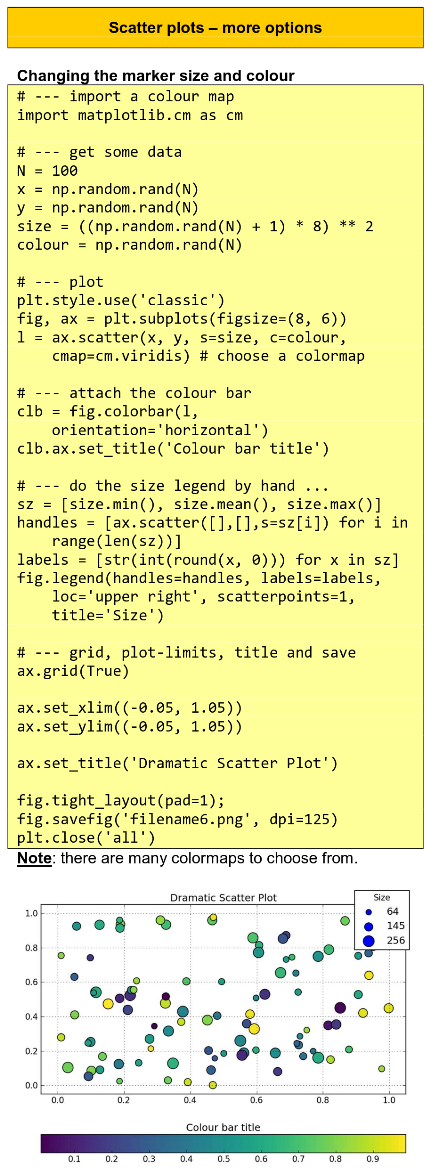

In [ ]:
import matplotlib.cm as cm

# x & y
x_tourney = total_tourney
y_tourney = total_avg

# Plotting
fig, ax = plt.subplots(figsize=(14,6))
l = ax.scatter(x_tourney, y_tourney, cmap=cm.plasma)

# Colorbar
clb = fig.colorbar(l, orientation='horizontal')
clb.ax.set_title('Color')

# Size Legend
sz = []

In [17]:
teams_sorted = teams.sort_values(ascending=False, by='PrizePerTournament')
#teams_sorted.head(50)

In [18]:
teams_genre_grouped_per_tournament = teams_sorted.groupby('Genre')['PrizePerTournament'].agg(np.mean)
teams_genre_grouped_per_tournament.head()

Genre
Battle Royale                      23767.907050
Collectible Card Game              12301.418000
First-Person Shooter               21844.509200
Multiplayer Online Battle Arena    34016.457471
Strategy                            4434.143000
Name: PrizePerTournament, dtype: float64

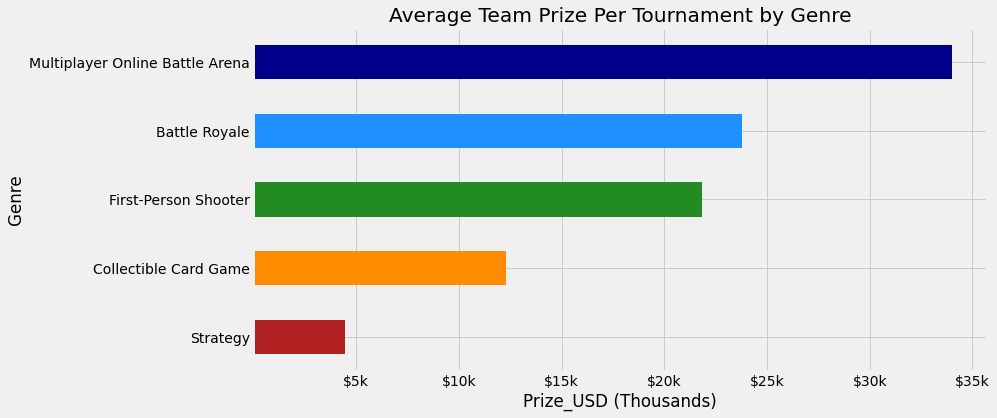

In [25]:
ax = teams_genre_grouped_per_tournament.sort_values(ascending=True).plot.barh(color=['firebrick', 'darkorange', 'forestgreen', 'dodgerblue', 'darkblue'])

ax.set_title('Average Team Prize Per Tournament by Genre')
ax.set_xlabel('Prize_USD (Thousands)')
ax.set_ylabel('Genre')
ax.set_xticks(ticks=[5000, 10000, 15000, 20000, 25000, 30000, 35000])
ax.set_xticklabels(['$5k','$10k','$15k','$20k','$25k','$30k','$35k'])

fig = ax.figure
fig.set_size_inches(14,6)
fig.tight_layout(pad=1)
fig.savefig('images/avg_prize_per_team_by_genre.png')

#plt.close()

In [19]:
teams_genre_grouped_per_tournament_game = teams_sorted.groupby('Game')['PrizePerTournament'].agg(np.mean)
teams_genre_grouped_per_tournament_game

Game
Arena of Valor                      53724.661042
Counter-Strike: Global Offensive    12187.513100
Dota 2                              50525.795700
Fortnite                            27385.208500
Hearthstone                         12301.418000
Heroes of the Storm                  9020.798900
League of Legends                   33042.840100
Overwatch                           31501.505300
PUBG                                20150.605600
Starcraft II                         4434.143000
Name: PrizePerTournament, dtype: float64

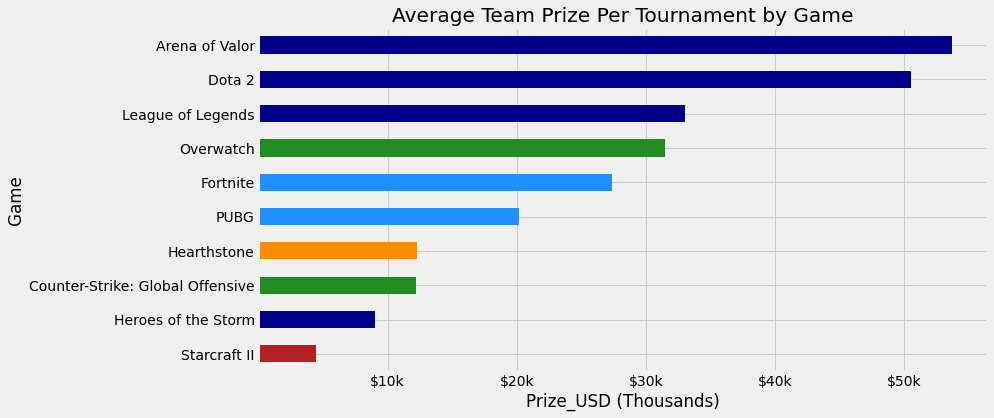

In [23]:
ax = teams_genre_grouped_per_tournament_game.sort_values(ascending=True).plot.barh(color=['firebrick', 'darkblue', 'forestgreen', 'darkorange', 'dodgerblue', 'dodgerblue', 'forestgreen', 'darkblue', 'darkblue', 'darkblue'])

ax.set_title('Average Team Prize Per Tournament by Game')
ax.set_xlabel('Prize_USD (Thousands)')
ax.set_ylabel('Game')
ax.set_xticks(ticks=[10000, 20000, 30000, 40000, 50000])
ax.set_xticklabels(['$10k','$20k','$30k','$40k','$50k'])

fig = ax.figure
fig.set_size_inches(14,6)
fig.tight_layout(pad=1)
fig.savefig('images/average_team_prize_per_game.png')

#plt.close()

# Analyzing prize money in Players DataFrame

## Using Averages grouped by game

In [21]:
# Averages 
games_mean_prize = games.groupby('Game')['TotalUSDPrize'].agg(np.mean)
games_mean_prize_sorted = games_mean_prize.sort_values(ascending=False).apply(k_format)
games_mean_prize_sorted

Game
Dota 2                              $1791.8K
Counter-Strike: Global Offensive     $565.4K
Fortnite                             $434.1K
League of Legends                    $350.4K
Starcraft II                         $253.8K
Hearthstone                          $133.4K
PUBG                                 $124.4K
Overwatch                            $123.5K
Heroes of the Storm                  $117.8K
Arena of Valor                        $83.3K
Name: TotalUSDPrize, dtype: object

In [22]:
# Averages
color_games_averages = ['darkblue', 'darkblue', 'forestgreen', 'dodgerblue', 'darkorange', 'firebrick', 'darkblue', 'dodgerblue', 'forestgreen',  'darkblue']

In [ ]:
# Averages
ax = games_mean_prize.sort_values(ascending=True).plot.barh(color=color_games)

ax.set_title('Total Prize Per Game by Player')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_ylabel('Game')
ax.set_xticks(ticks=[250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000])
ax.set_xticklabels(['$250k','$500k','$750k','$1m','$1.25m','$1.50m','$1.75m','$2m'])

fig = ax.figure
fig.set_size_inches(14,6)
fig.tight_layout(pad=1)
#fig.savefig('images/barh_players_prize_per_game.png')

#plt.close()

## Using averages grouped by genre

In [ ]:
# Averges by Genre
genre_mean_prize = games.groupby('Genre')['TotalUSDPrize'].agg(np.mean)
genre_mean_prize_sorted = genre_mean_prize.sort_values(ascending=False)#.apply(k_format)
genre_mean_prize_sorted

In [ ]:
# Averages
color_genre_averages = ['darkorange', 'firebrick', 'dodgerblue' , 'forestgreen', 'darkblue']

In [ ]:
# Averages
ax = genre_mean_prize.sort_values(ascending=True).plot.barh(color=color_genre_averages)

ax.set_title('Average Player Earnings Per Genre')
ax.set_xlabel('Prize_USD (Thousands)')
ax.set_ylabel('Game')
ax.set_xticks(ticks=[100000, 200000, 300000, 400000, 500000, 600000])
ax.set_xticklabels(['$100k','$200k','$300k','$400k','$500k','$600k'])

fig = ax.figure
fig.set_size_inches(14,6)
fig.tight_layout(pad=1)
#fig.savefig('images/barh_players_prize_per_genere.png')

## Using totals grouped by Game

In [ ]:
# Totals
game_total_prizes = games.groupby('Game')['TotalUSDPrize'].agg(np.sum)
game_total_prizes_mil = game_total_prizes.apply(mil_format).sort_values(ascending=True)
game_total_prizes_mil

In [ ]:
# Totals
ax = game_total_prizes.sort_values(ascending=True).plot.barh()

ax.set_title('Total Prize Per Game')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_ylabel('Game')
ax.set_xticks(ticks=[25000000, 50000000, 75000000, 100000000, 125000000, 150000000, 175000000, 200000000])
ax.set_xticklabels(['$25m','$50m','$75m','$100m','$125m','$150m','$175m','$200m'])

fig = ax.figure
fig.set_size_inches(14,6)
fig.tight_layout(pad=1)
#fig.savefig('images/hist_prize_per_game.png')

#plt.close()

In [ ]:
# Totals
ax = game_total_prizes.sort_values().plot.pie(autopct='%1.1f%%')

ax.set_title('Prize Share Per Game')
ax.set_ylabel('')

fig = ax.figure
fig.set_size_inches(18,10)
#fig.savefig('images/pie_prize_share.png')

# Plotting individual games

In [ ]:
games_individual_sorted = games.sort_values(ascending=False, by='TotalUSDPrize')
games_individual_sorted_k = games_individual_sorted['TotalUSDPrize']#.apply(k_format)
games_individual_sorted_k.head()

In [ ]:
unique_names = games_grouped_individual_sorted.Game.unique()

unique_names

In [ ]:
#fig, ax = plt.subplots(figsize=(14,10))

ax = games_grouped_individual_sorted['TotalUSDPrize'].hist(figsize=(14,14), bins=50)

#ax.hist(individual_game_prizes)

ax.set_title('Prize Earnings Per Game')
ax.set_xlabel('Individual_Games')
ax.set_ylabel('Prize_USD')
ax.set_yticks([1000000, 2000000, 3000000, 4000000, 5000000, 6000000, 7000000])
ax.set_yticklabels(['$1m','$2m','$3m','$4m', '$5m', '$6m', '$7m'])
#ax.tick_params(labelbottom=False)

fig = ax.figure
fig.set_size_inches(14,14)
fig.tight_layout(pad=1)

# Analyzing prize money by Country in Players DataFrame

## Total Player Earnings Per Country:

In [ ]:
country_total_earnings = players.groupby('CountryCode')['TotalUSDPrize'].sum()
country_total_earnings_sorted = country_total_earnings.sort_values(ascending=False)#.apply(mil_format)
#country_total_earnings_sorted

In [ ]:
ax = country_total_earnings.sort_values().plot.barh()

ax.set_title('Total Prize Earnings Per Country')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_ylabel('Country Code')
ax.set_xticks(ticks=[25000000, 50000000, 75000000, 100000000])
ax.set_xticklabels(['$25m','$50m','$75m','$100m'])

fig = ax.figure
fig.set_size_inches(14,14)
fig.tight_layout(pad=1)
#fig.savefig('images/barh_conrties_prize_total.png')

## Average Player Earnings Per Country

In [ ]:
country_average_earnings = players.groupby('CountryCode')['TotalUSDPrize'].mean()
country_average_earnings_sorted = country_average_earnings.sort_values(ascending=False).apply(k_format)
#country_average_earnings_sorted

In [ ]:
ax = country_average_earnings.sort_values().plot.barh()

ax.set_title('Average Prize Per Game Grouped By Country')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_ylabel('Country')
ax.set_xticks(ticks=[1000000, 2000000, 3000000, 4000000, 5000000])
ax.set_xticklabels(['$1m','$2m','$3m','$4m','$5m'])

fig = ax.figure
fig.set_size_inches(14,14)
fig.tight_layout(pad=1)
#fig.savefig('images/barh_conrties_prize_per_game.png')

# Where are the top 100 players?

In [ ]:
player_by_country = players.groupby('CountryCode')['Game'].count()
#player_by_country = player_by_country.sort_values(ascending=True)
#player_by_country

In [ ]:
ax = player_by_country.sort_values().plot.barh()

ax.set_title('Average Prize Per Game Grouped By Country')
ax.set_xlabel('Prize_USD (Millions)')
ax.set_ylabel('Country')
ax.set_xticks(ticks=[1000000, 2000000, 3000000, 4000000, 5000000])
ax.set_xticklabels(['$1m','$2m','$3m','$4m','$5m'])

fig = ax.figure
fig.set_size_inches(14,14)
fig.tight_layout(pad=1)